# BIG MART SALES DATA PREDICTION

### CONTENTS

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis

### PROBLEM STATEMENT

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### DATA



* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


### Step 1: Importing the Relevant libraries 

In [2]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [4]:
# Analysis related libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [7]:
# ML relatated libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Step 2 : Data inspection
#### Reading the dataframe

In [8]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [60]:
# Lets take a lock on the data
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [12]:
train.shape, test.shape

((8523, 12), (5681, 11))

##### As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

### Checking if there is missing values

In [22]:
# Train missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:
# Test Missing values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### We have same missing values percentage of Item Size and Outlet Size columns as that of in Test set.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [61]:
# Training categorical and numerical columns
cat = train.select_dtypes(include=[np.object])
print("Training categorical Features in Train Set:", len(cat.columns))
num = train.select_dtypes(include=[np.float64, np.int64])
print("Training numerical Features in Train Set:", len(num.columns))

# testing categorical and numerical columns
cat = test.select_dtypes(include=[np.object])
print("\nTesting categorical Features in Test Set:", len(cat.columns))
num = test.select_dtypes(include=[np.float64, np.int64])
print("Testing numerical Features in Test Set:", len(num.columns))

Training categorical Features in Train Set: 7
Training numerical Features in Train Set: 5

Testing categorical Features in Test Set: 7
Testing numerical Features in Test Set: 4


It makes sense because the test set has a missing column "Item_Outlet_Sales" which we will predict 

In [33]:
# Numerical description of the data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [36]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Step 3. Data Cleaning 

#### Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

We have missing values in two columns, so we will see what we can dot to impute these missing values
##### 1) Item weight

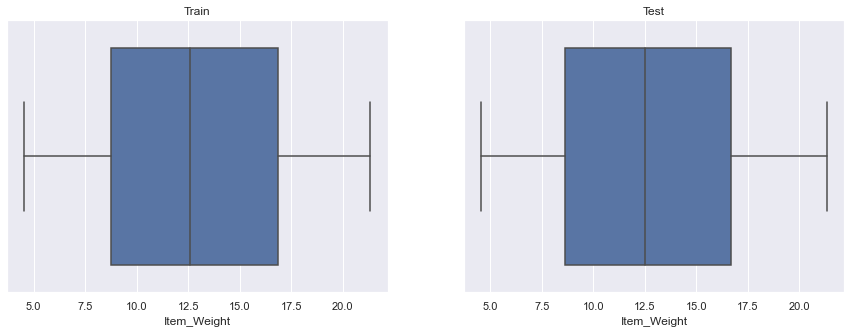

In [55]:
# ploting the weight to see the distribution of the data
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.boxplot("Item_Weight", data=train, ax=axes[0])
axes[0].set_title("Train")

sns.boxplot("Item_Weight", data=test, ax=axes[1])
axes[1].set_title("Test");

There are no "outlires" in the box plots above, so i think it is save to impute the missing values with weight mean

In [56]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

##### 2) Outlet size 
The outlet_size column 28% of its values are missing 

In [69]:
train["Outlet_Size"].isnull().sum(), test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [67]:
# Checking nature of the data in the column
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [68]:
test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

##### Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [75]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

##### Sanity check

In [78]:
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

The "False" means there is no missing values in the dataset

##### I hava noticed that the item_fat_content has two categorical values but the are encoded unproparly

In [80]:
# Checking categorical values in the column
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [87]:
# Fixing the column in train and test dataset
train["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
test["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)

In [91]:
# Sanity check
print(train["Item_Fat_Content"].value_counts())
print("\n",test["Item_Fat_Content"].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

 Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


#### Also the column type needed to fixed

In [112]:
# Changing the column type to string 
train["Item_Fat_Content"] = train["Item_Fat_Content"].apply(str)
test["Item_Fat_Content"] = test["Item_Fat_Content"].astype(str)

In [113]:
# Sanity check
train["Item_Fat_Content"].dtypes, train["Item_Fat_Content"].dtypes

(dtype('O'), dtype('O'))

In [117]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Step 4  : EDA

### 1) Univariate Analysis

#### 1.1) Item Fat Content

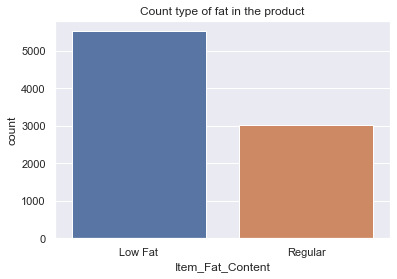

In [121]:
sns.countplot('Item_Fat_Content',data=train)
plt.title("Count type of fat in the product");

## Observations:

* The Items bought are more of Low Fat.

#### 1.2) Item type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

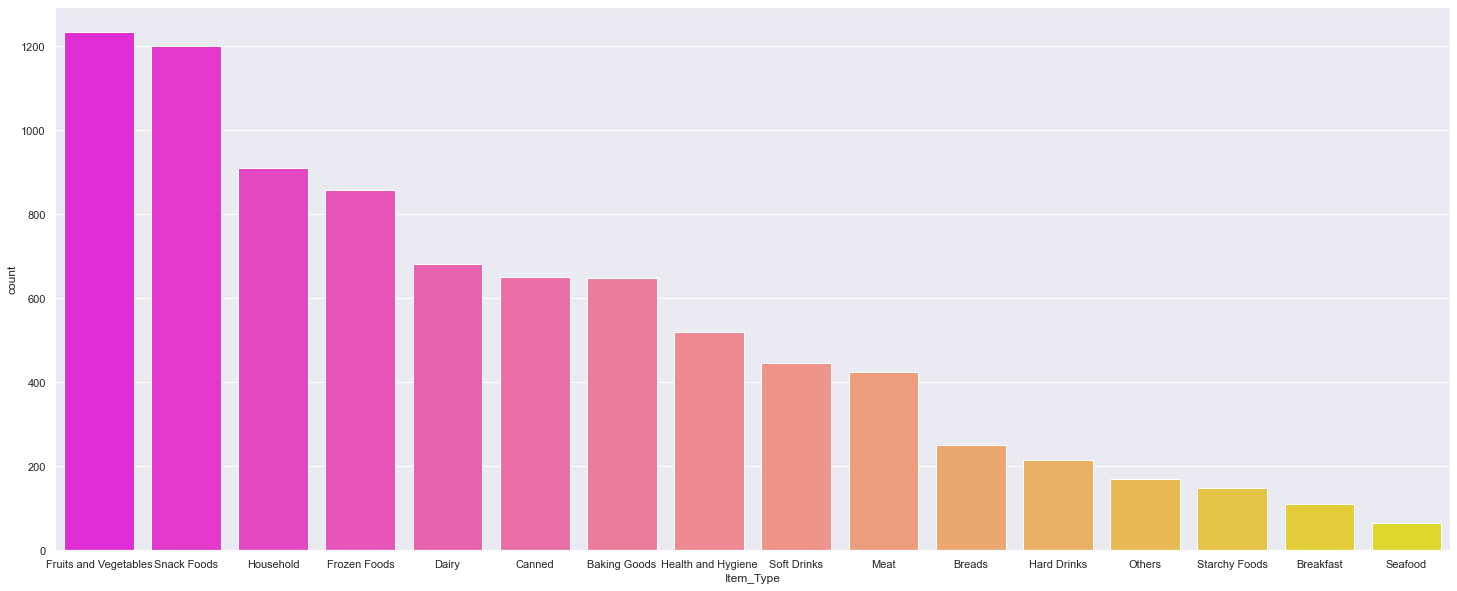

In [126]:
plt.figure(figsize=(25,10))
sns.countplot('Item_Type',data=train,palette='spring',
              order=train['Item_Type'].value_counts().index)